# Błędy numeryczne

Zagadnienia:
* Reprezentacja liczb w komputerze:
    * Zapis stałoprzecinkowy,
    * Zapis zmiennoprzecinkowy (standard IEEE 754),
* Błędy numeryczne:
    * Błąd względny i bezwzględny.
    * Błąd zaokrąglenia (ang. *round-off error*).
    * Błąd obcięcia (ang. *truncation error*).
    * Błędy związane z przyjętym sposobem rozwiązywania.

## Błąd względny i bezwzględny

***Zadanie 1.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:  
* $\textrm{e}_1^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    

* $\textrm{e}_2^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

* $\textrm{e}_3^{*}=\sum\limits_{n=0}^{20} \frac{1}{n!}$  

In [25]:
import math

# Funkcja obliczająca aproksymację liczby e
def calculate_e_approximation(n):
    e_approx = sum(1 / math.factorial(i) for i in range(n+1))
    return e_approx

# Prawdziwa wartość liczby e
e_true = math.e

# Aproksymacje dla różnych n
e_1_star = calculate_e_approximation(5)
e_2_star = calculate_e_approximation(10)
e_3_star = calculate_e_approximation(20)

# Obliczanie błędów bezwzględnych i względnych
abs_error_1 = abs(e_true - e_1_star)
rel_error_1 = abs_error_1 / abs(e_true)

abs_error_2 = abs(e_true - e_2_star)
rel_error_2 = abs_error_2 / abs(e_true)

abs_error_3 = abs(e_true - e_3_star)
rel_error_3 = abs_error_3 / abs(e_true)

# Wyświetlanie wyników
print(f"Aproksymacja e_1^* (n=5): {e_1_star}")
print(f"Błąd bezwzględny: {abs_error_1}")
print(f"Błąd względny: {rel_error_1}")

print(f"\nAproksymacja e_2^* (n=10): {e_2_star}")
print(f"Błąd bezwzględny: {abs_error_2}")
print(f"Błąd względny: {rel_error_2}")

print(f"\nAproksymacja e_3^* (n=20): {e_3_star}")
print(f"Błąd bezwzględny: {abs_error_3}")
print(f"Błąd względny: {rel_error_3}")


Aproksymacja e_1^* (n=5): 2.716666666666667
Błąd bezwzględny: 0.0016151617923783057
Błąd względny: 0.0005941848175815963

Aproksymacja e_2^* (n=10): 2.7182818011463845
Błąd bezwzględny: 2.7312660577649694e-08
Błąd względny: 1.0047766310211053e-08

Aproksymacja e_3^* (n=20): 2.718281828459045
Błąd bezwzględny: 0.0
Błąd względny: 0.0


## Zapis zmiennoprzecinkowy

**Uwaga**: Używane tu pojęcie **cecha** ma inne znaczenie, niż poznane być może w szkole – skrótowo: „część całkowita”. Dlatego poniżej dodawane jest inne określenie – „wykładnik”.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [10]:
print(np.finfo(float))
eps = np.finfo(float).eps

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



***Zadanie 2.***


a) Wstaw dowolną wartość do liczby x, np. 0.1. Które liczby mają tę samą mantysę, a które tę samą cechę (wykładnik)? Sprawdź wypisując ich wartości w formacie hex.


**Uwaga:** Do odczytania liczby w formacie szesnastkowym możesz wykorzystać funkcję:

In [11]:
1.25.hex()

'0x1.4000000000000p+0'

In [12]:
5000.0.hex()

'0x1.3880000000000p+12'

lub

In [13]:
import struct
def double_to_hex(f):
    print(hex(struct.unpack('<Q', struct.pack('<d', f))[0]))

In [14]:
double_to_hex(1.25)

0x3ff4000000000000


Zamianę w drugą stronę można przeprowadzić za pomocą funkcji *int*

In [15]:
int('3ff', 16)

1023

In [16]:
import struct

# Funkcja do konwersji liczby zmiennoprzecinkowej na zapis szesnastkowy IEEE 754
def double_to_hex(f):
    return hex(struct.unpack('<Q', struct.pack('<d', f))[0])

# Lista wartości do analizy
values = [0.1, 0.2, 0.05, 0.03333333333333333, 1.0, 10.0, 0.001, 1e-05]

# Tworzenie tabeli wyników
print(f"{'Liczba':<15}{'Hex IEEE 754'}")
print("=" * 35)

for val in values:
    print(f"{val:<15}{double_to_hex(val)}")


Liczba         Hex IEEE 754
0.1            0x3fb999999999999a
0.2            0x3fc999999999999a
0.05           0x3fa999999999999a
0.033333333333333330x3fa1111111111111
1.0            0x3ff0000000000000
10.0           0x4024000000000000
0.001          0x3f50624dd2f1a9fc
1e-05          0x3ee4f8b588e368f1




b) Porównaj zapis liczb 0.1, 0.2 i 0.3 w formacie zmiennoprzecinkowym.

* Czy można przewidzieć, czy suma 0.1 + 0.2 będzie reprezentowana dokładnie tak samo jak liczba 0.3?
* Jaki będzie wynik porównania tej sumy z liczbą 0.3 i konsekwencje użycia warunku równościowego / nierównościowego w pętli?



In [17]:
import struct

def double_to_hex(f):
    return hex(struct.unpack('<Q', struct.pack('<d', f))[0])

# Sprawdzenie reprezentacji liczb
print("0.1 ->", double_to_hex(0.1))
print("0.2 ->", double_to_hex(0.2))
print("0.3 ->", double_to_hex(0.3))
print("0.1 + 0.2 ->", double_to_hex(0.1 + 0.2))


0.1 -> 0x3fb999999999999a
0.2 -> 0x3fc999999999999a
0.3 -> 0x3fd3333333333333
0.1 + 0.2 -> 0x3fd3333333333334


c) Przyjmijmy, że „skrótowe” określenie *liczba dokładnie reprezentowana* oznacza liczbę, która jest reprezentowana w formacie zmiennoprzecinkowym dokładnie, tzn. bez konieczności zaokrąglania.
* Ile jest liczb dokładnie reprezentowanych w przedziale $[1, 2)$?
* Zaobserwuj (z pomocą formatu hex) jakie wartości mają bity w polu mantysy w przypadku liczby 1.0.
* Jaką liczbę trzeba dodać do 1.0, aby tylko na najmłodszej pozycji pola mantysy pojawiło się 1?
* Czy wyżej otrzymana suma jest najmniejszą liczbą dokładnie reprezentowana, spośród liczb większych od 1?
* Jak przypuszczasz, jakie wartości będą miały poszczególne bity mantysy w przypadku największej liczby dokładnie reprezentowanej, której cecha (wykładnik) jest równy 0? Sprawdź, czy tak jest rzeczywiście – wpisując wartość tej liczby (jaka to jest wartość?).


In [26]:
import struct

# Funkcja do konwersji liczby zmiennoprzecinkowej na zapis hex
def double_to_hex(f):
    return hex(struct.unpack('<Q', struct.pack('<d', f))[0])

# 1. Obserwacja liczby 1.0
print("Reprezentacja liczby 1.0:")
print(double_to_hex(1.0))

# 2. Jaka liczba musi być dodana do 1.0, aby tylko najmłodsza pozycja mantysy była 1?
epsilon = 2**-52  # Najmniejsza zmiana, która zmienia najmłodszy bit mantysy
print(f"Najmniejsza liczba, którą trzeba dodać do 1.0, aby zmienić najmłodszy bit mantysy: {epsilon}")
print("Reprezentacja tej liczby:", double_to_hex(1.0 + epsilon))

# 3. Najmniejsza liczba dokładnie reprezentowana, większa od 1
next_after_1 = 1.0 + epsilon
print(f"Najmniejsza liczba dokładnie reprezentowana większa od 1: {next_after_1}")
print("Reprezentacja w formacie hex:", double_to_hex(next_after_1))

# 4. Sprawdzanie największej liczby dokładnie reprezentowanej z wykładnikiem 0
# Największa liczba dokładnie reprezentowana, której wykładnik wynosi 0, to 2.0
print("Reprezentacja liczby 2.0:", double_to_hex(2.0))


Reprezentacja liczby 1.0:
0x3ff0000000000000
Najmniejsza liczba, którą trzeba dodać do 1.0, aby zmienić najmłodszy bit mantysy: 2.220446049250313e-16
Reprezentacja tej liczby: 0x3ff0000000000001
Najmniejsza liczba dokładnie reprezentowana większa od 1: 1.0000000000000002
Reprezentacja w formacie hex: 0x3ff0000000000001
Reprezentacja liczby 2.0: 0x4000000000000000


d) Oblicz długości przedziałów, do których należą wszystkie liczby mające cechę (wykładnik) równy: 0, 1, 2, 5, -1, -3.

* Czy w każdym z tych przedziałów jest tyle samo liczb dokładnie reprezentowanych? Jeżeli nie, to ile w każdym z nich?
* Jaka jest odległość między dwoma sąsiednimi liczbami dokładnie reprezentowanymi (odległość, czyli różnica ich wartości) w każdym z tych przedziałów?
* Jaki jest maksymalny błąd bezwzględny zaokrąglenia w każdym z tych przedziałów?
* Jaki jest maksymalny błąd względny zaokrąglenia w każdym z tych przedziałów?





In [27]:
import numpy as np
import struct

# Funkcja konwertująca liczbę zmiennoprzecinkową na hex (do analizy)
def double_to_hex(f):
    return hex(struct.unpack('<Q', struct.pack('<d', f))[0])

# Funkcja obliczająca różnicę między kolejnymi liczbami w danym przedziale wykładników
def calc_interval_size(exponent):
    # Zaczynamy od 1.0 + epsilon
    epsilon = 2**-52  # Najmniejsza zmiana w mantysie
    lower = 1.0 * 2**exponent
    upper = lower + epsilon * 2**exponent
    return upper - lower

# Funkcja obliczająca błąd bezwzględny i względny
def calc_errors(real, approx):
    abs_error = abs(real - approx)
    rel_error = abs_error / abs(real) if real != 0 else float('inf')
    return abs_error, rel_error

# Funkcja obliczająca liczbę dokładnie reprezentowanych liczb w przedziale
def count_exact_representations(exponent):
    epsilon = 2**-52  # Najmniejsza zmiana w mantysie
    lower = 1.0 * 2**exponent
    upper = lower + epsilon * 2**exponent
    count = (upper - lower) / epsilon
    return int(count)

# Definiujemy wykładniki
exponents = [0, 1, 2, 5, -1, -3]

# Obliczamy długości przedziałów, liczbę reprezentowanych liczb, błędy
for exponent in exponents:
    print(f"Wykładnik: {exponent}")
    
    # Długość przedziału
    interval_size = calc_interval_size(exponent)
    print(f"Długość przedziału: {interval_size}")
    
    # Liczba dokładnie reprezentowanych liczb
    exact_count = count_exact_representations(exponent)
    print(f"Liczba dokładnie reprezentowanych liczb: {exact_count}")
    
    # Błąd bezwzględny i względny (dla przykładu 1.0 jako wartość rzeczywistą)
    real_value = 1.0 * 2**exponent
    approx_value = real_value + interval_size  # Symulujemy przybliżoną wartość
    abs_error, rel_error = calc_errors(real_value, approx_value)
    
    print(f"Błąd bezwzględny: {abs_error}")
    print(f"Błąd względny: {rel_error}")
    print()


Wykładnik: 0
Długość przedziału: 2.220446049250313e-16
Liczba dokładnie reprezentowanych liczb: 1
Błąd bezwzględny: 2.220446049250313e-16
Błąd względny: 2.220446049250313e-16

Wykładnik: 1
Długość przedziału: 4.440892098500626e-16
Liczba dokładnie reprezentowanych liczb: 2
Błąd bezwzględny: 4.440892098500626e-16
Błąd względny: 2.220446049250313e-16

Wykładnik: 2
Długość przedziału: 8.881784197001252e-16
Liczba dokładnie reprezentowanych liczb: 4
Błąd bezwzględny: 8.881784197001252e-16
Błąd względny: 2.220446049250313e-16

Wykładnik: 5
Długość przedziału: 7.105427357601002e-15
Liczba dokładnie reprezentowanych liczb: 32
Błąd bezwzględny: 7.105427357601002e-15
Błąd względny: 2.220446049250313e-16

Wykładnik: -1
Długość przedziału: 1.1102230246251565e-16
Liczba dokładnie reprezentowanych liczb: 0
Błąd bezwzględny: 1.1102230246251565e-16
Błąd względny: 2.220446049250313e-16

Wykładnik: -3
Długość przedziału: 2.7755575615628914e-17
Liczba dokładnie reprezentowanych liczb: 0
Błąd bezwzględny

***Zadanie 3.***

Spójrz na poniższe zjawiska, zastanów się nad ich przyczynami.

***Problem skali***

Jaki wynika da poniższy kod:

In [18]:
a = 1.0
b = 0.0000000000000000000000001
c = a + b
print(f'{c:.17f}')

1.00000000000000000


***Problem reprezentacji w zapisie binarnym*** 

In [19]:
if 0.1+0.2==0.3:
    print("True")
else:
    print("False")

False


In [20]:
suma = 0
for i in range(0,100):
    suma += 0.1
print(f'{suma:.15f}')

9.999999999999980


**Zadanie 4.**

Niech:
* $a=0.3$
* $b=10^{-13}$
* $c=a-b$
* $d=a-c$

Czy $b$ i $d$ są sobie równe w sensie analitycznym? Co z przypadkiem numerycznym? Zdefiniuj odpowiednie zmienne i porównaj wyniki. Porównaj szesnastkowe i dziesietne reprezentacje zmiennych `b` i `d`. Ile cyfr w reprezentacji `d` możemy uznać za wiarygodne?

In [21]:
import struct

# Funkcja do konwersji liczby zmiennoprzecinkowej na zapis szesnastkowy IEEE 754
def double_to_hex(f):
    return hex(struct.unpack('<Q', struct.pack('<d', f))[0])

# Definicja zmiennych
a = 0.3
b = 1e-13
c = a - b
d = a - c

# Porównanie wartości analitycznych i numerycznych
b_equals_d = (b == d)

# Wypisanie wyników
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"d = {d}")
print(f"b == d -> {b_equals_d}")
print(f"b (hex) -> {double_to_hex(b)}")
print(f"d (hex) -> {double_to_hex(d)}")


a = 0.3
b = 1e-13
c = 0.2999999999999
d = 9.997558336749535e-14
b == d -> False
b (hex) -> 0x3d3c25c268497682
d (hex) -> 0x3d3c240000000000


**Zadanie 5.**

Rozważmy macierz kwadratową:
$$ A=\left[\begin{array}{ccc}
\sqrt{2} & \frac{1}{7}\\
\pi\sqrt{2} &\frac{\pi}{7}\\
\end{array}\right]
$$
* Czy jest to macierz osobliwa? Jak to sprawdzić?
* Oblicz wyznacznik tej macierzy w sposób analityczny i numeryczny (`np.linalg.det`). Czy otrzymałeś te same wartości? Czy wyniki obliczeń numerycznych prowadzą do poprawnej odpowiedzi na pierwsze pytanie? Jakie może to mieć skutki?

In [22]:
import numpy as np

A = np.array([[np.sqrt(2), 1/7], [np.pi*np.sqrt(2), np.pi/7]])
det_A = np.linalg.det(A)

print("Wyznacznik numeryczny:", det_A)

Wyznacznik numeryczny: 0.0


**Zadanie 6.**

Jedną z metod rozwiązywania równań nieliniowych jest metoda Newtona. Metoda ta powtarza obliczenia, aż spełniony nie będzie warunek stopu. Jeżeli spełnione są odpowiednie założenia to metoda ta zbiega do rozwiązania. Załóżmy, że warunki są spełnione i rozważmy funkcję $f(x)=cos(x)-x$. Poniżej znajdziesz implementację metody Newtona, w której brakuje warunku stopu. Spróbuj go uzupełnić. Warunek powinien być spełniony w momencie, w którym chcemy zakończyć działanie procedury.

Z matematycznego punktu widzenia znajdujemy się w zerze, jeżeli kolejne przybliżenia uzyskane z metody Newtona nie różnią się od siebie (np. dwa ostatnie). Zaimplementuj taki warunek i sprawdź, czy program zatrzyma się. Czy taki warunek stopu jest bezpieczny i można go stosować uniwersalnie? Jak można go poprawić?

In [ ]:
def newton(f, f_prim, x_0):
    x_prev = x_0
    while True:
        x_n=x_prev-(f(x_prev)/f_prim(x_prev))
        print(f'x_0={x_n}')
        double_to_hex(x_n)
        
        if True: # Zastąp True swoim warunkiem stopu
            return x_n
        else:
            x_prev=x_n

In [ ]:
def f(x):
    return # Uzupełnij definicję funkcji 

def f_prim(x):
    return # Uzupełnij definicję pochodnej

In [23]:
import numpy as np

# Funkcja
def f(x):
    return np.cos(x) - x

# Pochodna funkcji
def f_prim(x):
    return -np.sin(x) - 1

# Implementacja metody Newtona
def newton(f, f_prim, x_0, tol=1e-10, max_iter=100):
    x_prev = x_0
    for _ in range(max_iter):
        x_n = x_prev - f(x_prev) / f_prim(x_prev)
        print(f'x_n={x_n}')  # Podgląd iteracji
        
        # Warunek stopu: różnica mniejsza niż tolerancja
        if abs(x_n - x_prev) < tol:
            return x_n
        
        x_prev = x_n
    
    raise ValueError("Metoda Newtona nie zbiega w zadanej liczbie iteracji.")

# Wywołanie metody
x_start = 1.0
root = newton(f, f_prim, x_start)
print(f"Przybliżony pierwiastek: {root}")


x_n=0.7503638678402439
x_n=0.7391128909113617
x_n=0.739085133385284
x_n=0.7390851332151607
x_n=0.7390851332151607
Przybliżony pierwiastek: 0.7390851332151607


**Zadanie domowe**  

Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi^{*} \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $,
w którym $\pi^{*}$ jest przybliżeniem liczby $\pi$ z dokładnością do 15 miejsc po przecinku.
  
Stwórz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora (do przybliżenia wartości $\pi$ możesz wykorzystać funkcję *[round](https://numpy.org/doc/stable/reference/generated/numpy.round_.html)*). Oblicz błąd bezwzględny i błąd względny otrzymanych wyników. Przedstaw rezultaty na wykresie w zależności od $n$. Wartości błędów przedstaw w skali logarytmicznej (funkcja *plt.semilogy()*).

Przeanalizuj rozwiązanie i odpowiedz na następujące pytania:  
* Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
* Jak zmienia się błąd w zależności od $n$? O czym to świadczy?
* Z jakim/jakimi rodzajami błędu mamy do czynienie?


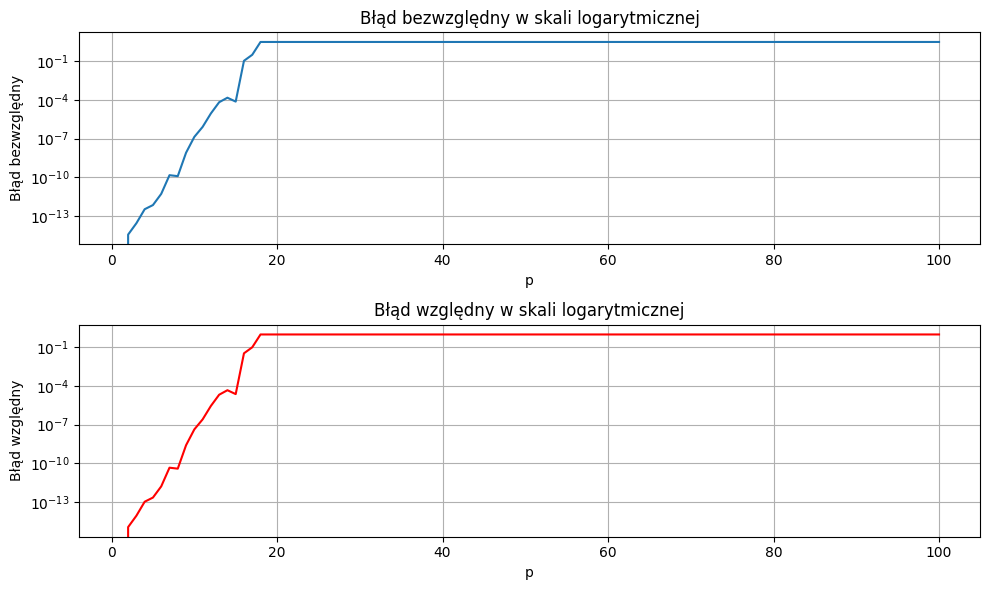

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja do obliczenia G(p)
def G(p):
    pi_approx = round(np.pi, 15)  # Przybliżenie liczby pi do 15 miejsc po przecinku
    return (1/p) * (10**p * (1 + p * pi_approx * 10**(-p)) - 10**p)

# Oblicz n pierwszych wyrazów ciągu G(p)
def calculate_G(n):
    values = np.array([G(p) for p in range(1, n+1)])
    return values

# Obliczanie błędów
def calculate_errors(values, true_value):
    abs_error = np.abs(values - true_value)
    rel_error = abs_error / np.abs(true_value)
    return abs_error, rel_error

# Parametry
n = 100  # Liczba wyrazów
true_value = np.pi  # Rzeczywista wartość pi

# Obliczanie ciągu G(p)
G_values = calculate_G(n)

# Obliczanie błędów
abs_errors, rel_errors = calculate_errors(G_values, true_value)

# Wykres błędów bezwzględnych i względnych w skali logarytmicznej
plt.figure(figsize=(10, 6))

# Błąd bezwzględny
plt.subplot(2, 1, 1)
plt.semilogy(np.arange(1, n+1), abs_errors, label="Błąd bezwzględny")
plt.xlabel('p')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd bezwzględny w skali logarytmicznej')
plt.grid(True)

# Błąd względny
plt.subplot(2, 1, 2)
plt.semilogy(np.arange(1, n+1), rel_errors, label="Błąd względny", color='red')
plt.xlabel('p')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w skali logarytmicznej')
plt.grid(True)

plt.tight_layout()
plt.show()
